<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Sun Aug 27 10:06:56 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 457.49       Driver Version: 457.49       CUDA Version: 11.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce GTX 1650   WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   45C    P8     3W /  N/A |    442MiB /  4096MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

2.0.1


'cpu'

## 1. What are 3 areas in industry where computer vision is currently being used?

- Face detection
- Object detection
- Classify image

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

- When a Model performs too well but cant find the general pattern of the data

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

- Use large dataset
- Change learning rate
- Tranfer learning from different model

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

- Result of a CNN layer is input of the next layer
- The "image" in each layer become more "abstract"

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [10]:
import torchvision
from torchvision.transforms import ToTensor

train_data = torchvision.datasets.MNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)
test_data = torchvision.datasets.MNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 9912422/9912422 [00:01<00:00, 4976449.35it/s]


Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 9600229.34it/s]


Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 5794868.32it/s]


Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw



100%|██████████| 4542/4542 [00:00<00:00, 2293862.58it/s]

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



## 6. Visualize at least 5 different samples of the MNIST training dataset.

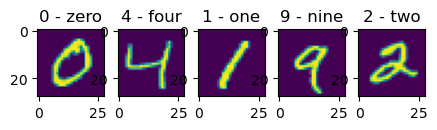

In [20]:
train_classes = train_data.classes

import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
for i in range(1, 6):
    img, label = train_data[i]
    plt.subplot(1,5,i)
    plt.imshow(img.squeeze())
    plt.title(train_classes[label])

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [21]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32
train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

len(train_dataloader), len(test_dataloader)

(1875, 313)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [29]:
from torch import nn

torch.manual_seed(42)

class TinyVGGModel(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(
                in_channels = input_shape,
                out_channels = hidden_units,
                kernel_size = 3,
                stride = 1,
                padding = 1
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels = hidden_units,
                out_channels = hidden_units,
                kernel_size = 3,
                stride = 1,
                padding = 1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding = 1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = hidden_units*7*7, out_features = output_shape)
        )
        
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x
    
model_1 = TinyVGGModel(1, 10, len(train_classes))
model_1.state_dict()

OrderedDict([('block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
           

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [37]:
# import torchmetrics 

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)
acc_fn = torchmetrics.Accuracy(task='multiclass', num_classes=len(train_classes))

epochs = 5
for epoch in range(epochs):
    # train model
    
    model_1.train()
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(train_dataloader):
        y_pred = model_1(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += acc_fn(y_pred.argmax(dim=1), y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)
    
    # test model
    model_1.eval()
    test_loss, test_acc = 0, 0
    with torch.inference_mode():
        for batch, (X, y) in enumerate(test_dataloader):
            test_pred = model_1(X)
            loss = loss_fn(test_pred, y)
            test_loss += loss
            test_acc += acc_fn(test_pred.argmax(dim=1), y)
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)
    print(f'Epoch: {epoch} | Train Loss: {train_loss:.5f} | Train Acc: {train_acc:.2f} | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}')

Epoch: 0 | Train Loss: 0.03854 | Train Acc: 0.99 | Test Loss: 0.04109 | Test Acc: 0.99
Epoch: 1 | Train Loss: 0.03574 | Train Acc: 0.99 | Test Loss: 0.04153 | Test Acc: 0.99
Epoch: 2 | Train Loss: 0.03362 | Train Acc: 0.99 | Test Loss: 0.03566 | Test Acc: 0.99
Epoch: 3 | Train Loss: 0.03155 | Train Acc: 0.99 | Test Loss: 0.03674 | Test Acc: 0.99
Epoch: 4 | Train Loss: 0.03067 | Train Acc: 0.99 | Test Loss: 0.04004 | Test Acc: 0.99


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

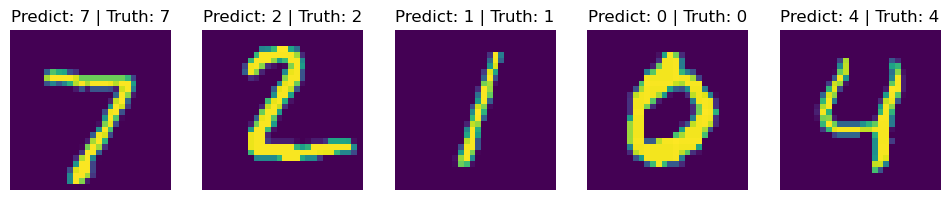

In [45]:
plt.figure(figsize=(12,9))
for i in range(5):
    img = test_data[i][0]
    label = test_data[i][1]
    
    model_pred_logit = model_1(img.unsqueeze(dim=0))
    model_pred_probs = torch.softmax(model_pred_logit, dim=1)
    model_pred_label = torch.argmax(model_pred_probs)
        
    plt.subplot(1,5,i+1)
    plt.imshow(img.squeeze())
    plt.title(f'Predict: {model_pred_label} | Truth: {label}')
    plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [48]:
!pip install -U mlxtend
import mlxtend
print(mlxtend.__version__)

     ---------------------------------------- 1.4/1.4 MB 3.7 MB/s eta 0:00:00
0.22.0


In [50]:
y_preds = []
model_1.eval()
with torch.inference_mode():
    for X, y in test_dataloader:
        y_logit = model_1(X)
        y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
        y_preds.append(y_pred)

y_pred_tensor = torch.cat(y_preds)

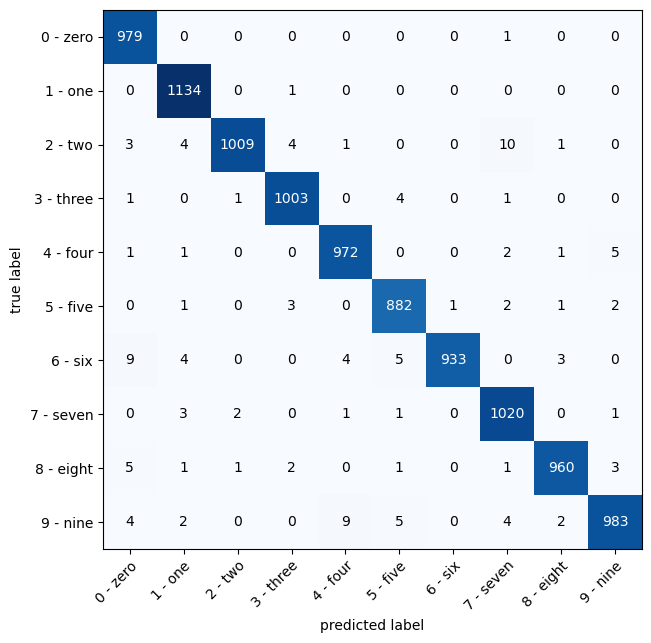

In [53]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(train_classes), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor, target=test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), 
    class_names=train_classes,
    figsize=(7,7)
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [54]:
rand_tensor = torch.rand([1, 3, 64, 64])
conv_layer = nn.Conv2d(
    in_channels=3,
    out_channels=64,
    kernel_size=3,
    padding=1
)
print(f'Original random tensor: {rand_tensor.shape}')
rand_tensor_through_conv_layer = conv_layer(rand_tensor)
print(f'Original random tensor: {rand_tensor_through_conv_layer.shape}')

Original random tensor: torch.Size([1, 3, 64, 64])
Original random tensor: torch.Size([1, 64, 64, 64])


## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [55]:
train_data = torchvision.datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)
test_data = torchvision.datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:21<00:00, 1246297.61it/s]


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 138553.92it/s]


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:02<00:00, 1568941.87it/s]


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



In [57]:
class_name = train_data.classes
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [58]:
BATCH_SIZE = 32
train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

len(train_dataloader), len(test_dataloader)

(1875, 313)

In [59]:
model_2 = TinyVGGModel(1,10,10)
model_2.state_dict()

OrderedDict([('block_1.0.weight',
              tensor([[[[ 0.2732,  0.1349,  0.0106],
                        [-0.3263, -0.2043,  0.2740],
                        [ 0.1312, -0.0988,  0.3220]]],
              
              
                      [[[-0.2448,  0.2269,  0.3264],
                        [-0.1240,  0.0929,  0.2089],
                        [-0.0790,  0.0726,  0.1635]]],
              
              
                      [[[-0.0955, -0.1893,  0.1029],
                        [-0.2896, -0.2932,  0.0052],
                        [-0.1631,  0.0961,  0.0666]]],
              
              
                      [[[-0.2690, -0.1917,  0.3237],
                        [-0.0235, -0.0456, -0.1505],
                        [ 0.1245,  0.1259,  0.1295]]],
              
              
                      [[[-0.1210,  0.1682,  0.2150],
                        [ 0.3115, -0.3176,  0.1220],
                        [-0.1198, -0.0945, -0.2440]]],
              
              
           

In [60]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)
acc_fn = torchmetrics.Accuracy(task='multiclass', num_classes=len(train_classes))

epochs = 5
for epoch in range(epochs):
    # train model
    
    model_1.train()
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(train_dataloader):
        y_pred = model_1(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += acc_fn(y_pred.argmax(dim=1), y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)
    
    # test model
    model_1.eval()
    test_loss, test_acc = 0, 0
    with torch.inference_mode():
        for batch, (X, y) in enumerate(test_dataloader):
            test_pred = model_1(X)
            loss = loss_fn(test_pred, y)
            test_loss += loss
            test_acc += acc_fn(test_pred.argmax(dim=1), y)
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)
    print(f'Epoch: {epoch} | Train Loss: {train_loss:.5f} | Train Acc: {train_acc:.2f} | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}')

Epoch: 0 | Train Loss: 0.49172 | Train Acc: 0.82 | Test Loss: 0.40205 | Test Acc: 0.85
Epoch: 1 | Train Loss: 0.35457 | Train Acc: 0.87 | Test Loss: 0.36504 | Test Acc: 0.87
Epoch: 2 | Train Loss: 0.32630 | Train Acc: 0.88 | Test Loss: 0.33947 | Test Acc: 0.88
Epoch: 3 | Train Loss: 0.31022 | Train Acc: 0.89 | Test Loss: 0.35736 | Test Acc: 0.87
Epoch: 4 | Train Loss: 0.29798 | Train Acc: 0.89 | Test Loss: 0.33173 | Test Acc: 0.88


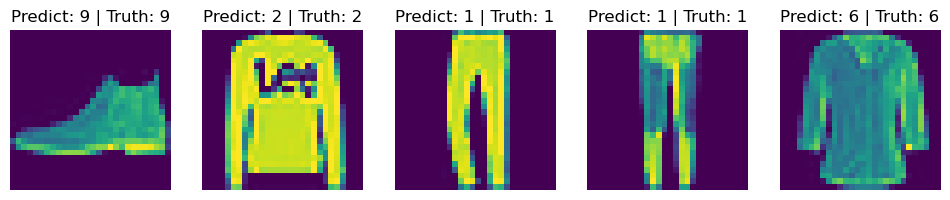

In [61]:
plt.figure(figsize=(12,9))
for i in range(5):
    img = test_data[i][0]
    label = test_data[i][1]
    
    model_pred_logit = model_1(img.unsqueeze(dim=0))
    model_pred_probs = torch.softmax(model_pred_logit, dim=1)
    model_pred_label = torch.argmax(model_pred_probs)
        
    plt.subplot(1,5,i+1)
    plt.imshow(img.squeeze())
    plt.title(f'Predict: {model_pred_label} | Truth: {label}')
    plt.axis(False)